In [514]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [515]:
# Conectar ao MT5
if not mt5.initialize():
    print("Falha na inicialização do MetaTrader5")
    mt5.shutdown()
    quit()

# Configurar o símbolo e o timeframe
symbol = "PETR4"
timeframe = mt5.TIMEFRAME_M1

In [516]:
# Definir os parâmetros do algoritmo
ema_period_short = 12
ema_period_long = 26
bb_period = 20
bb_deviation = 2
rsi_period = 10

In [517]:
# Método para calcular a MME curta
def calculate_ema_short(data):
    ema_short = pd.Series(index=data.index)
    ema_short.iloc[0] = data.iloc[0]
    for i in range(1, len(data)):
        ema_short.iloc[i] = (2 / (ema_period_short + 1)) * data.iloc[i] + (1 - 2 / (ema_period_short + 1)) * ema_short.iloc[i-1]
    return ema_short

# Método para calcular a MME longa
def calculate_ema_long(data):
    ema_long = pd.Series(index=data.index)
    ema_long.iloc[0] = data.iloc[0]
    for i in range(1, len(data)):
        ema_long.iloc[i] = (2 / (ema_period_long + 1)) * data.iloc[i] + (1 - 2 / (ema_period_long + 1)) * ema_long.iloc[i-1]
    return ema_long

# Método para calcular as Bandas de Bollinger
def calculate_bollinger_bands(data):
    sma = data.rolling(bb_period).mean()
    std = data.rolling(bb_period).std()
    upper_band = sma + bb_deviation * std
    lower_band = sma - bb_deviation * std
    return upper_band, sma, lower_band

# Método para calcular o RSI
def calculate_rsi(data):
    delta = data.diff()
    gain = delta.copy()
    gain[gain < 0] = 0
    loss = -delta.copy()
    loss[loss < 0] = 0
    avg_gain = gain.rolling(rsi_period).mean()
    avg_loss = loss.rolling(rsi_period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [518]:
import pytz
from datetime import datetime

# Obter os dados do símbolo e timeframe
# rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, 200)

timezone = pytz.timezone("America/Sao_Paulo")
# utc_from = datetime(2023, 5, 22, hour = 10, minute = 24, tzinfo=timezone)
utc_from = datetime(2023, 5, 23, tzinfo=timezone)
utc_to = datetime(2023, 5, 24, tzinfo=timezone)
# utc_to = datetime(2023, 5, 25, hour = 10, tzinfo=timezone)

rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)

In [519]:
# Criar um dataframe com os dados
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

In [520]:
def ema(data):
    ema2 = 50
    ema_long = pd.Series(index=data.index)
    ema_long.iloc[0] = data.iloc[0]
    for i in range(1, len(data)):
        ema_long.iloc[i] = (2 / (ema2 + 1)) * data.iloc[i] + (1 - 2 / (ema2 + 1)) * ema_long.iloc[i-1]
    return ema_long

In [521]:
# Calcular os indicadores
ema_short = calculate_ema_short(df['close'])
ema_long = calculate_ema_long(df['close'])
upper_band, sma, lower_band = calculate_bollinger_bands(df['close'])
rsi = calculate_rsi(df['close'])
# ema = ema(df['close'])

df['ema_short'] = ema_short
df['ema_long'] = ema_long
df['upper_band'] = upper_band
df['lower_band'] = lower_band
df['sma'] = sma
df['rsi'] = rsi

C:\Users\Anderson\AppData\Local\Temp\ipykernel_13808\22934674.py:3: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Anderson\AppData\Local\Temp\ipykernel_13808\22934674.py:11: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [522]:
df.describe()

,open,high,low,close,tick_volume,spread,real_volume,ema_short,ema_long,upper_band,lower_band,sma,rsi
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.0,4.120000e+02,412.000000,412.000000,393.000000,393.000000,393.000000,402.000000
mean,24.689442,24.707888,24.672791,24.690437,182.424757,1.0,1.403983e+05,24.681653,24.670555,24.762459,24.635215,24.698837,52.529445
std,0.149402,0.141024,0.153670,0.146977,111.281658,0.0,3.610756e+05,0.157134,0.168597,0.115661,0.150758,0.129508,18.082884
min,24.090000,24.180000,24.030000,24.100000,59.000000,1.0,7.700000e+03,24.100000,24.100000,24.440426,24.124614,24.328500,0.000000
25%,24.660000,24.680000,24.640000,24.670000,112.750000,1.0,3.880000e+04,24.662717,24.670046,24.726036,24.595736,24.670000,41.176471
50%,24.740000,24.750000,24.720000,24.740000,148.000000,1.0,7.955000e+04,24.734065,24.741143,24.800782,24.672404,24.740000,53.846154
75%,24.800000,24.810000,24.780000,24.790000,213.250000,1.0,1.422500e+05,24.794214,24.784649,24.844837,24.747359,24.796500,64.285714
max,24.890000,24.890000,24.840000,24.870000,836.000000,1.0,6.783200e+06,24.837247,24.822996,24.907345,24.806808,24.831000,92.307692


In [523]:
df

,open,high,low,close,tick_volume,spread,real_volume,ema_short,ema_long,upper_band,lower_band,sma,rsi
time,,,,,,,,,,,,,
2023-05-23 10:03:00,24.16,24.18,24.09,24.10,259,1,343600,24.100000,24.100000,NaN,NaN,NaN,NaN
2023-05-23 10:04:00,24.09,24.23,24.03,24.23,224,1,272600,24.120000,24.109630,NaN,NaN,NaN,NaN
2023-05-23 10:05:00,24.21,24.30,24.20,24.21,197,1,242400,24.133846,24.117064,NaN,NaN,NaN,NaN
2023-05-23 10:06:00,24.21,24.29,24.21,24.24,254,1,261600,24.150178,24.126171,NaN,NaN,NaN,NaN
2023-05-23 10:07:00,24.25,24.27,24.20,24.20,132,1,156000,24.157843,24.131640,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 16:50:00,24.77,24.77,24.74,24.75,216,1,95800,24.759079,24.754112,24.783391,24.727609,24.7555,46.666667
2023-05-23 16:51:00,24.75,24.77,24.74,24.77,234,1,61500,24.760759,24.755289,24.784580,24.727420,24.7560,60.000000
2023-05-23 16:52:00,24.75,24.78,24.75,24.77,245,1,103400,24.762181,24.756379,24.785718,24.727282,24.7565,60.000000


In [524]:
# Imprimir os resultados no console
print("Preço: \n", df['close'])
print("EMA Short: \n", ema_short)
print("EMA Long: \n", ema_long)
print("SMA: \n", sma)
print("Upper Band: \n", upper_band)
print("Lower Band: \n", lower_band)
print("RSI: \n", rsi)

Preço: 
 time
2023-05-23 10:03:00    24.10
2023-05-23 10:04:00    24.23
2023-05-23 10:05:00    24.21
2023-05-23 10:06:00    24.24
2023-05-23 10:07:00    24.20
                       ...  
2023-05-23 16:50:00    24.75
2023-05-23 16:51:00    24.77
2023-05-23 16:52:00    24.77
2023-05-23 16:53:00    24.78
2023-05-23 16:54:00    24.72
Name: close, Length: 412, dtype: float64
EMA Short: 
 time
2023-05-23 10:03:00    24.100000
2023-05-23 10:04:00    24.120000
2023-05-23 10:05:00    24.133846
2023-05-23 10:06:00    24.150178
2023-05-23 10:07:00    24.157843
                         ...    
2023-05-23 16:50:00    24.759079
2023-05-23 16:51:00    24.760759
2023-05-23 16:52:00    24.762181
2023-05-23 16:53:00    24.764922
2023-05-23 16:54:00    24.758011
Length: 412, dtype: float64
EMA Long: 
 time
2023-05-23 10:03:00    24.100000
2023-05-23 10:04:00    24.109630
2023-05-23 10:05:00    24.117064
2023-05-23 10:06:00    24.126171
2023-05-23 10:07:00    24.131640
                         ...    
20

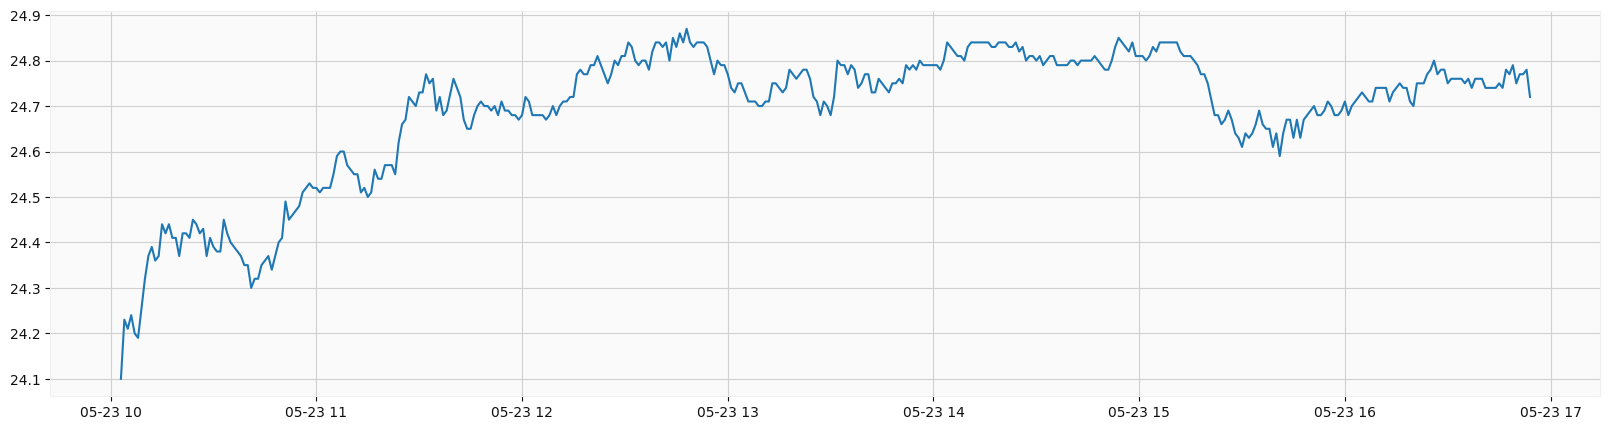

In [525]:
plt.figure(figsize=(20, 5))
plt.plot(df['close'])

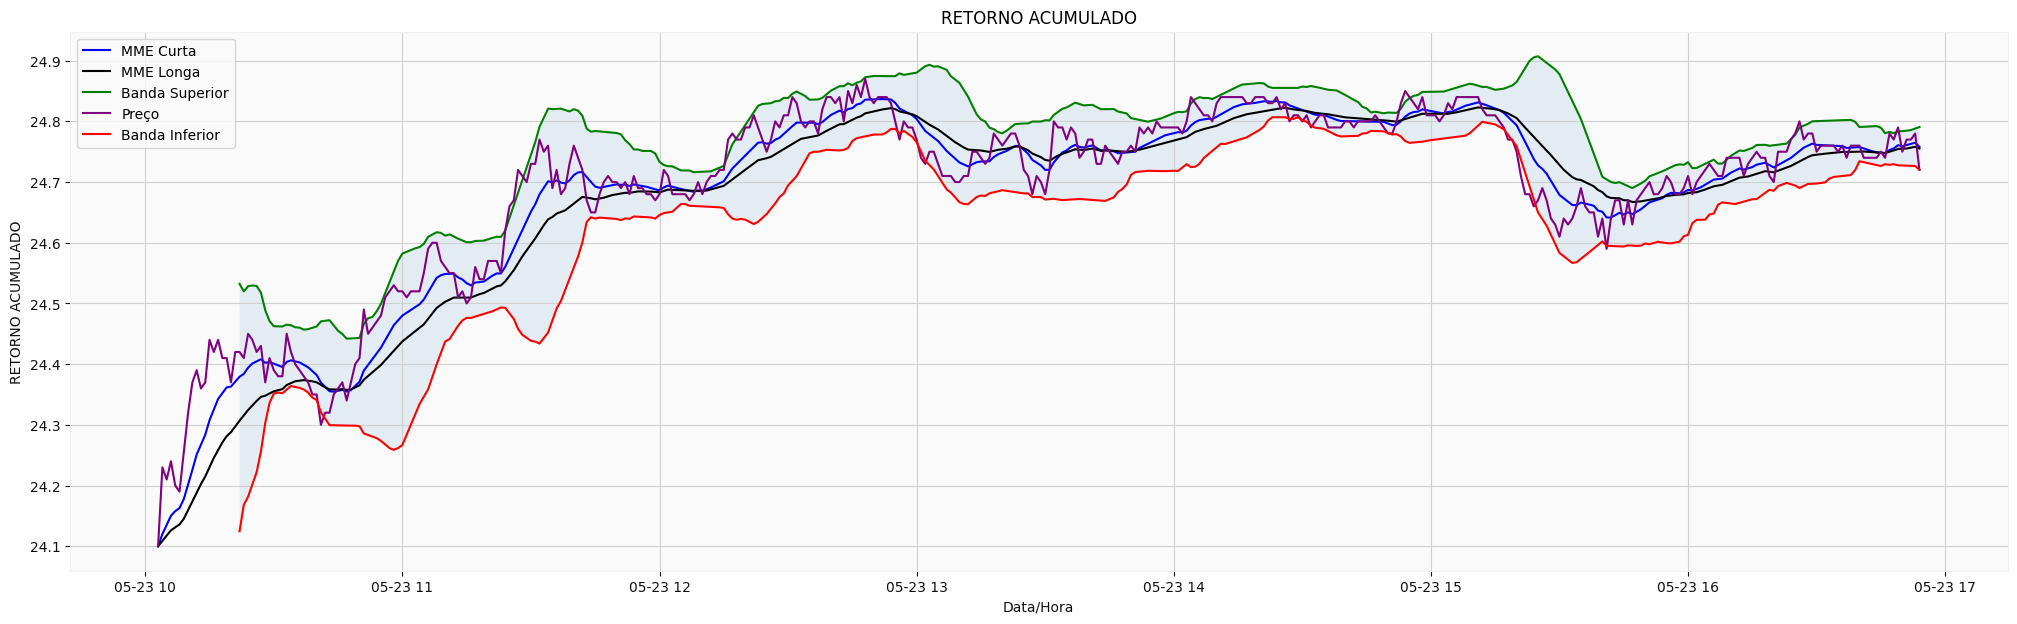

In [526]:
#Plotar os resultados
plt.figure(figsize=(25, 7))
plt.plot(ema_short, color='blue')
plt.plot(ema_long, color='black')
plt.plot(upper_band, color='green')
plt.plot(df['close'], color='purple')
plt.plot(lower_band, color='red')
# plt.plot(ema, color='red')
plt.fill_between(df.index, lower_band, upper_band, alpha=0.1)
plt.title('RETORNO ACUMULADO')
plt.xlabel('Data/Hora')
plt.ylabel('RETORNO ACUMULADO')
plt.legend(['MME Curta', 'MME Longa', 'Banda Superior', 'Preço', 'Banda Inferior'])
plt.show()

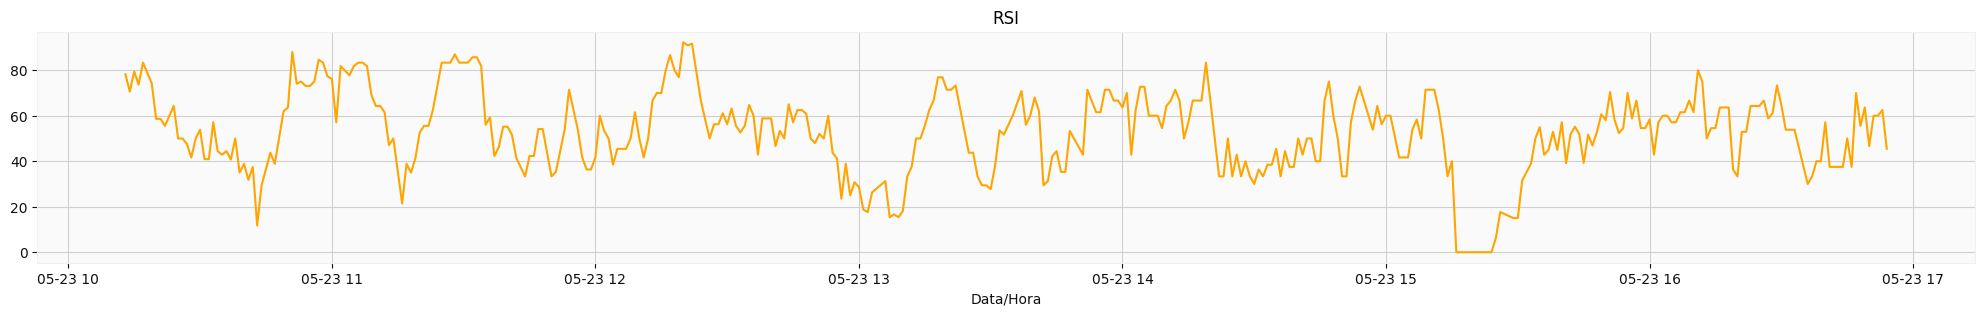

In [527]:
plt.figure(figsize=(25, 3))
plt.title('RSI')
plt.xlabel('Data/Hora')
plt.plot(rsi, color='orange')

<AxesSubplot:xlabel='time'>

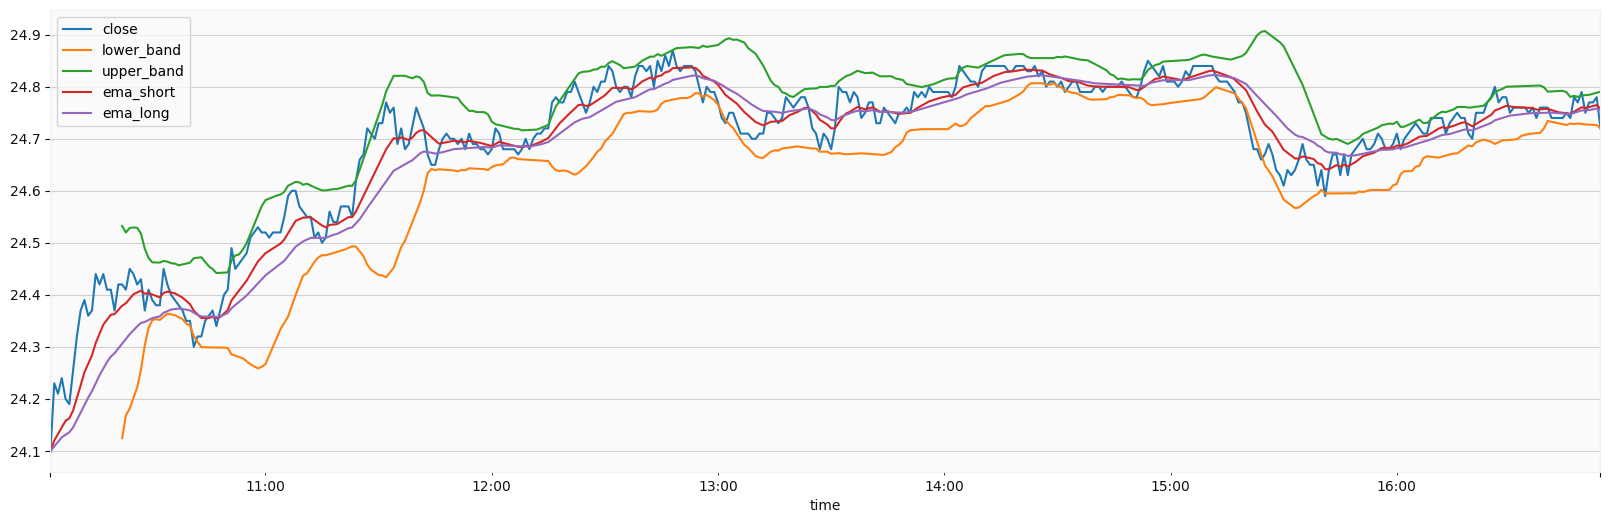

In [528]:
df[['close','lower_band', 'upper_band', 'ema_short', 'ema_long']].plot(figsize=(20, 6))

In [529]:
import cufflinks as cf
cf.go_offline()

In [530]:
df.iplot(kind='candle')

In [531]:
qf = cf.QuantFig(df, title='Setup', legend='top', name='Candlestick')
qf.add_bollinger_bands(periods=20,boll_std=2)
qf.add_rsi(periods=20,color='java')
qf.add_macd()
qf.iplot()

In [532]:
#Do vídeo: df = Criando Candlestick com Python Matplotlib
import mplfinance as mpf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [533]:
print(mpf.available_styles())

['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']


In [534]:
df_sem_indicadores = pd.DataFrame(rates)
df_sem_indicadores['time'] = pd.to_datetime(df_sem_indicadores['time'], unit='s')
df_sem_indicadores.set_index('time', inplace=True)

In [535]:
df_sem_indicadores

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2023-05-23 10:03:00,24.16,24.18,24.09,24.10,259,1,343600
2023-05-23 10:04:00,24.09,24.23,24.03,24.23,224,1,272600
2023-05-23 10:05:00,24.21,24.30,24.20,24.21,197,1,242400
2023-05-23 10:06:00,24.21,24.29,24.21,24.24,254,1,261600
2023-05-23 10:07:00,24.25,24.27,24.20,24.20,132,1,156000
...,...,...,...,...,...,...,...
2023-05-23 16:50:00,24.77,24.77,24.74,24.75,216,1,95800
2023-05-23 16:51:00,24.75,24.77,24.74,24.77,234,1,61500
2023-05-23 16:52:00,24.75,24.78,24.75,24.77,245,1,103400


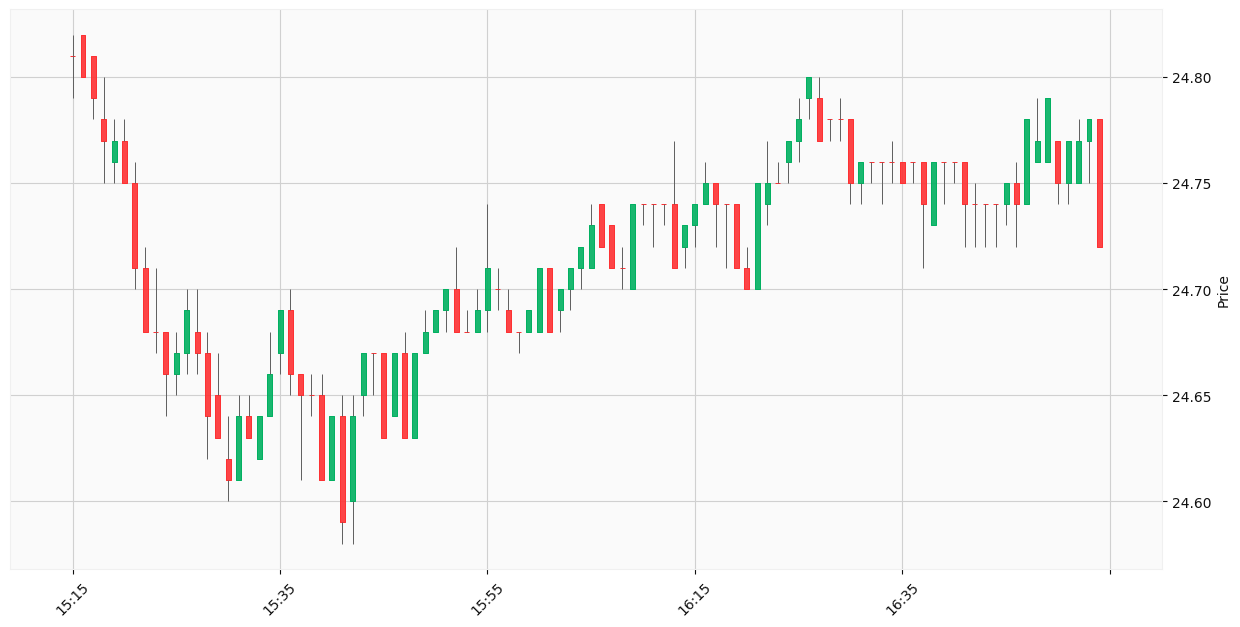

In [536]:
mpf.plot(df_sem_indicadores.tail(100), type='candle', figsize=(16, 8), style='yahoo')

In [537]:
df

,open,high,low,close,tick_volume,spread,real_volume,ema_short,ema_long,upper_band,lower_band,sma,rsi
time,,,,,,,,,,,,,
2023-05-23 10:03:00,24.16,24.18,24.09,24.10,259,1,343600,24.100000,24.100000,NaN,NaN,NaN,NaN
2023-05-23 10:04:00,24.09,24.23,24.03,24.23,224,1,272600,24.120000,24.109630,NaN,NaN,NaN,NaN
2023-05-23 10:05:00,24.21,24.30,24.20,24.21,197,1,242400,24.133846,24.117064,NaN,NaN,NaN,NaN
2023-05-23 10:06:00,24.21,24.29,24.21,24.24,254,1,261600,24.150178,24.126171,NaN,NaN,NaN,NaN
2023-05-23 10:07:00,24.25,24.27,24.20,24.20,132,1,156000,24.157843,24.131640,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 16:50:00,24.77,24.77,24.74,24.75,216,1,95800,24.759079,24.754112,24.783391,24.727609,24.7555,46.666667
2023-05-23 16:51:00,24.75,24.77,24.74,24.77,234,1,61500,24.760759,24.755289,24.784580,24.727420,24.7560,60.000000
2023-05-23 16:52:00,24.75,24.78,24.75,24.77,245,1,103400,24.762181,24.756379,24.785718,24.727282,24.7565,60.000000


<AxesSubplot:xlabel='time'>

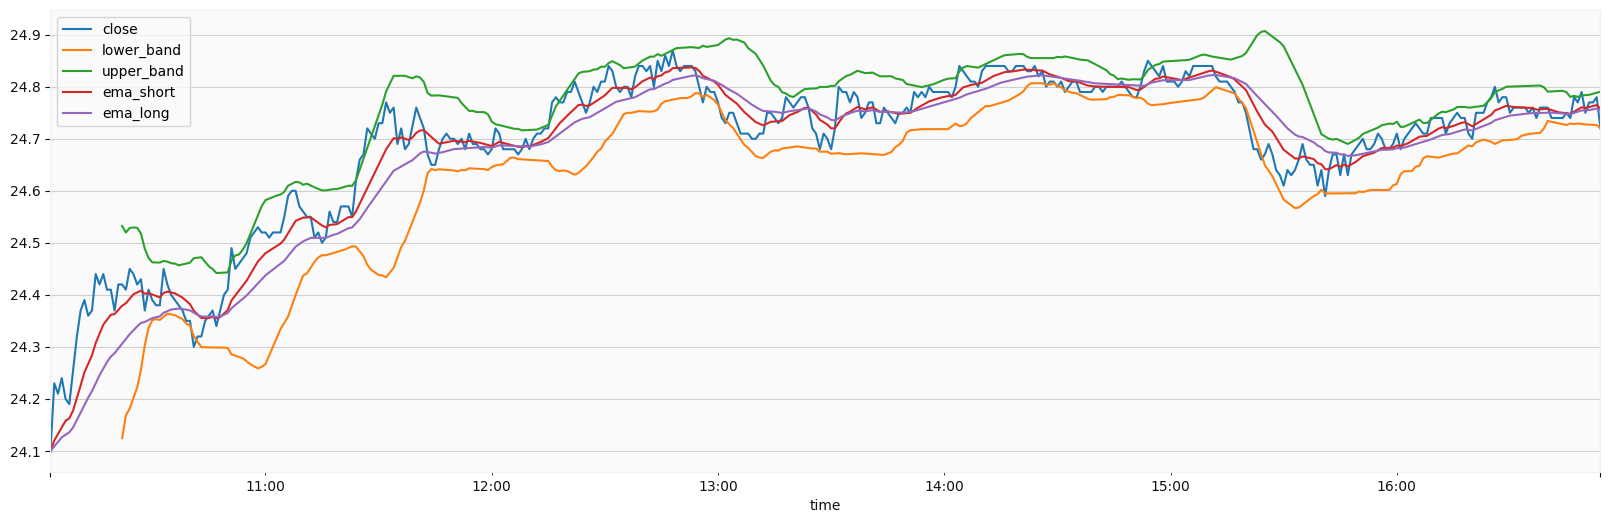

In [538]:
df[['close','lower_band', 'upper_band', 'ema_short', 'ema_long']].plot(figsize=(20, 6))

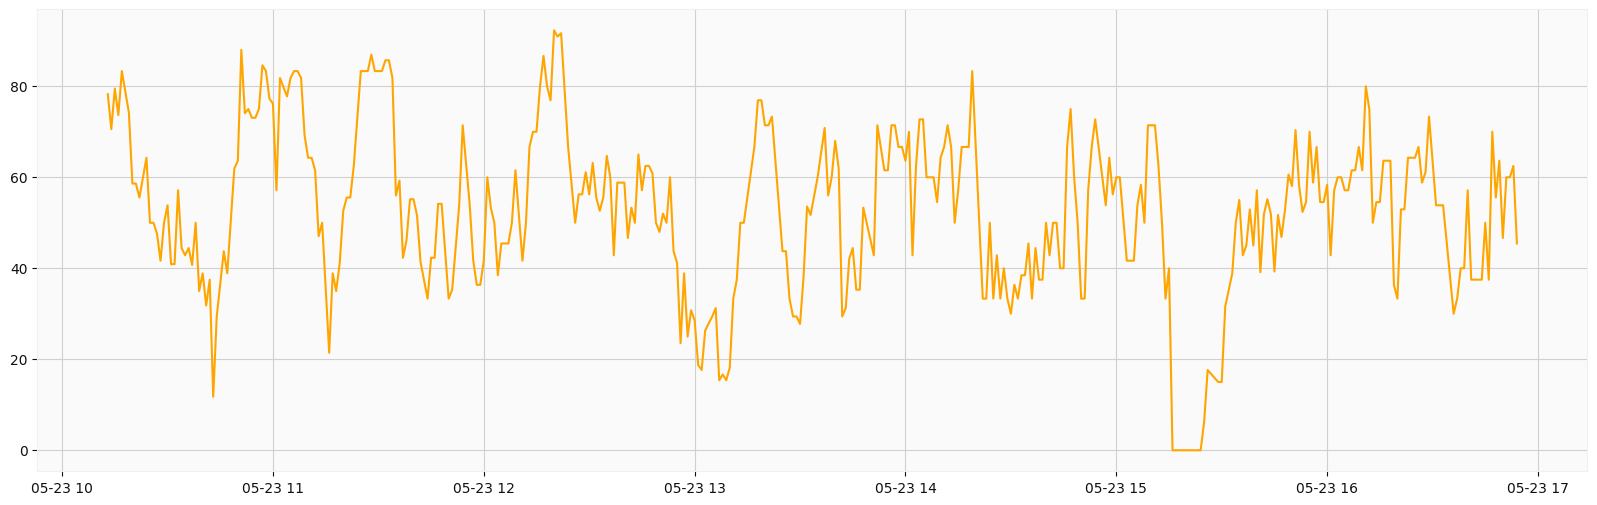

In [539]:
plt.figure(figsize=(20, 6))
plt.plot(rsi, color='orange')

In [540]:
#Calcular os sinais de compra e venda EMA
def ema_signal():
    df["signal"] = 0
# df.loc[(df["ema_short"] > df["ema_long"]), "signal"] = 1
# df.loc[(df["ema_short"] < df["ema_long"]), "signal"] = -1

    df["signal"] = np.where(df["ema_short"] > df["ema_long"], 1, np.where(df["ema_short"] < df["ema_long"], -1, 0))

    crossings = df["signal"].diff()
    df["signal"] = np.where(crossings != 0, crossings.cumsum(), 0)

In [541]:
# Calcular os sinais de compra e venda DE EMA + BB + RSI
df["signal"] = 0
df.loc[(df["ema_short"] > df["ema_long"]) & (df["close"] < df["lower_band"]) & (df["rsi"] < 20), "signal"] = 1
df.loc[(df["ema_short"] < df["ema_long"]) & (df["close"] > df["upper_band"]) & (df["rsi"] > 80), "signal"] = -1

In [542]:
df

,open,high,low,close,tick_volume,spread,real_volume,ema_short,ema_long,upper_band,lower_band,sma,rsi,signal
time,,,,,,,,,,,,,,
2023-05-23 10:03:00,24.16,24.18,24.09,24.10,259,1,343600,24.100000,24.100000,NaN,NaN,NaN,NaN,0
2023-05-23 10:04:00,24.09,24.23,24.03,24.23,224,1,272600,24.120000,24.109630,NaN,NaN,NaN,NaN,0
2023-05-23 10:05:00,24.21,24.30,24.20,24.21,197,1,242400,24.133846,24.117064,NaN,NaN,NaN,NaN,0
2023-05-23 10:06:00,24.21,24.29,24.21,24.24,254,1,261600,24.150178,24.126171,NaN,NaN,NaN,NaN,0
2023-05-23 10:07:00,24.25,24.27,24.20,24.20,132,1,156000,24.157843,24.131640,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 16:50:00,24.77,24.77,24.74,24.75,216,1,95800,24.759079,24.754112,24.783391,24.727609,24.7555,46.666667,0
2023-05-23 16:51:00,24.75,24.77,24.74,24.77,234,1,61500,24.760759,24.755289,24.784580,24.727420,24.7560,60.000000,0
2023-05-23 16:52:00,24.75,24.78,24.75,24.77,245,1,103400,24.762181,24.756379,24.785718,24.727282,24.7565,60.000000,0


<AxesSubplot:xlabel='time'>

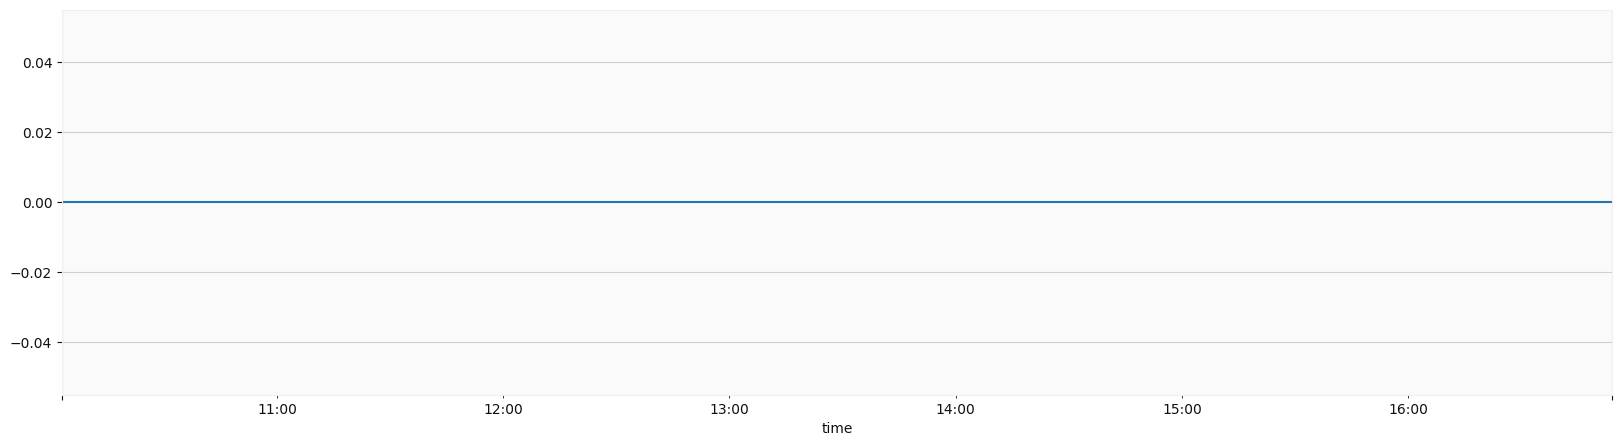

In [543]:
df["signal"].plot(figsize=(20, 5))

In [544]:
df

,open,high,low,close,tick_volume,spread,real_volume,ema_short,ema_long,upper_band,lower_band,sma,rsi,signal
time,,,,,,,,,,,,,,
2023-05-23 10:03:00,24.16,24.18,24.09,24.10,259,1,343600,24.100000,24.100000,NaN,NaN,NaN,NaN,0
2023-05-23 10:04:00,24.09,24.23,24.03,24.23,224,1,272600,24.120000,24.109630,NaN,NaN,NaN,NaN,0
2023-05-23 10:05:00,24.21,24.30,24.20,24.21,197,1,242400,24.133846,24.117064,NaN,NaN,NaN,NaN,0
2023-05-23 10:06:00,24.21,24.29,24.21,24.24,254,1,261600,24.150178,24.126171,NaN,NaN,NaN,NaN,0
2023-05-23 10:07:00,24.25,24.27,24.20,24.20,132,1,156000,24.157843,24.131640,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 16:50:00,24.77,24.77,24.74,24.75,216,1,95800,24.759079,24.754112,24.783391,24.727609,24.7555,46.666667,0
2023-05-23 16:51:00,24.75,24.77,24.74,24.77,234,1,61500,24.760759,24.755289,24.784580,24.727420,24.7560,60.000000,0
2023-05-23 16:52:00,24.75,24.78,24.75,24.77,245,1,103400,24.762181,24.756379,24.785718,24.727282,24.7565,60.000000,0


In [545]:
# Calcular os sinais de compra e venda BB + RSI
df["signal"] = 0
df.loc[(df["close"] < df["lower_band"]) & (df["rsi"] < 20), "signal"] = 1
df.loc[(df["close"] > df["upper_band"]) & (df["rsi"] > 80), "signal"] = -1

In [546]:
df

,open,high,low,close,tick_volume,spread,real_volume,ema_short,ema_long,upper_band,lower_band,sma,rsi,signal
time,,,,,,,,,,,,,,
2023-05-23 10:03:00,24.16,24.18,24.09,24.10,259,1,343600,24.100000,24.100000,NaN,NaN,NaN,NaN,0
2023-05-23 10:04:00,24.09,24.23,24.03,24.23,224,1,272600,24.120000,24.109630,NaN,NaN,NaN,NaN,0
2023-05-23 10:05:00,24.21,24.30,24.20,24.21,197,1,242400,24.133846,24.117064,NaN,NaN,NaN,NaN,0
2023-05-23 10:06:00,24.21,24.29,24.21,24.24,254,1,261600,24.150178,24.126171,NaN,NaN,NaN,NaN,0
2023-05-23 10:07:00,24.25,24.27,24.20,24.20,132,1,156000,24.157843,24.131640,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 16:50:00,24.77,24.77,24.74,24.75,216,1,95800,24.759079,24.754112,24.783391,24.727609,24.7555,46.666667,0
2023-05-23 16:51:00,24.75,24.77,24.74,24.77,234,1,61500,24.760759,24.755289,24.784580,24.727420,24.7560,60.000000,0
2023-05-23 16:52:00,24.75,24.78,24.75,24.77,245,1,103400,24.762181,24.756379,24.785718,24.727282,24.7565,60.000000,0


<AxesSubplot:xlabel='time'>

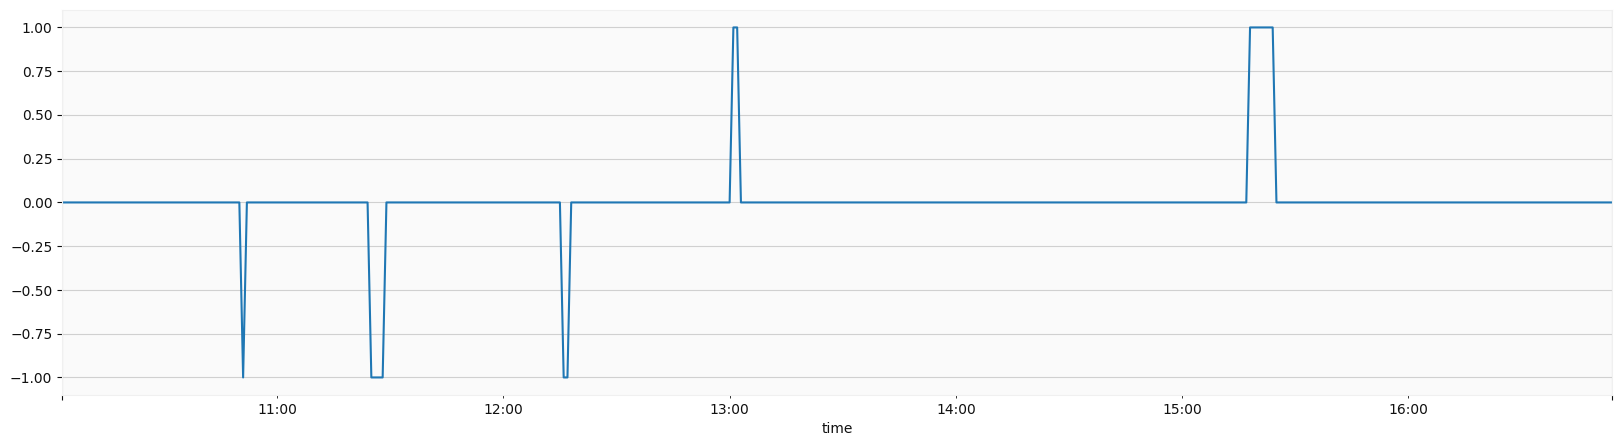

In [547]:
df["signal"].plot(figsize=(20, 5))

In [548]:
# Calcular os sinais de compra e venda EMA + RSI
df["signal"] = 0
df.loc[(df["ema_short"] > df["ema_long"]) & (df["rsi"] < 20), "signal"] = 1
df.loc[(df["ema_short"] < df["ema_long"]) & (df["rsi"] > 80), "signal"] = -1

<AxesSubplot:xlabel='time'>

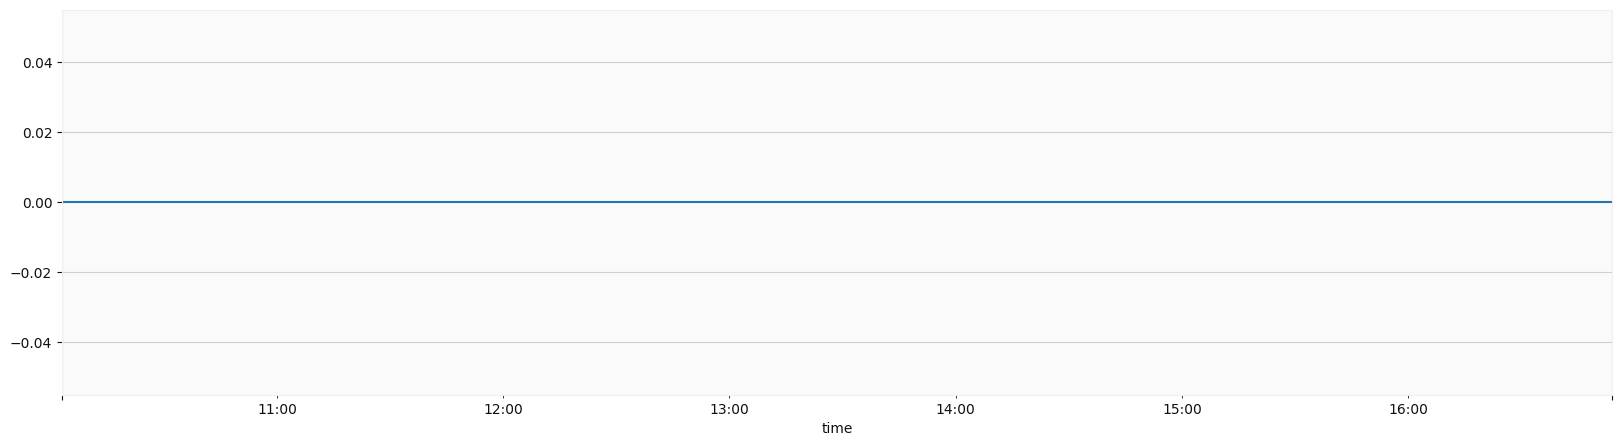

In [549]:
df["signal"].plot(figsize=(20, 5))

In [550]:
#Calcular os sinais de compra e venda EMA
df["signal"] = 0
# df.loc[(df["ema_short"] > df["ema_long"]), "signal"] = 1
# df.loc[(df["ema_short"] < df["ema_long"]), "signal"] = -1

df["signal"] = np.where(df["ema_short"] > df["ema_long"], 1, np.where(df["ema_short"] < df["ema_long"], -1, 0))

crossings = df["signal"].diff()
df["signal"] = np.where(crossings != 0, crossings.cumsum(), 0)

In [551]:
df

,open,high,low,close,tick_volume,spread,real_volume,ema_short,ema_long,upper_band,lower_band,sma,rsi,signal
time,,,,,,,,,,,,,,
2023-05-23 10:03:00,24.16,24.18,24.09,24.10,259,1,343600,24.100000,24.100000,NaN,NaN,NaN,NaN,NaN
2023-05-23 10:04:00,24.09,24.23,24.03,24.23,224,1,272600,24.120000,24.109630,NaN,NaN,NaN,NaN,1.0
2023-05-23 10:05:00,24.21,24.30,24.20,24.21,197,1,242400,24.133846,24.117064,NaN,NaN,NaN,NaN,0.0
2023-05-23 10:06:00,24.21,24.29,24.21,24.24,254,1,261600,24.150178,24.126171,NaN,NaN,NaN,NaN,0.0
2023-05-23 10:07:00,24.25,24.27,24.20,24.20,132,1,156000,24.157843,24.131640,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 16:50:00,24.77,24.77,24.74,24.75,216,1,95800,24.759079,24.754112,24.783391,24.727609,24.7555,46.666667,0.0
2023-05-23 16:51:00,24.75,24.77,24.74,24.77,234,1,61500,24.760759,24.755289,24.784580,24.727420,24.7560,60.000000,0.0
2023-05-23 16:52:00,24.75,24.78,24.75,24.77,245,1,103400,24.762181,24.756379,24.785718,24.727282,24.7565,60.000000,0.0


<AxesSubplot:xlabel='time'>

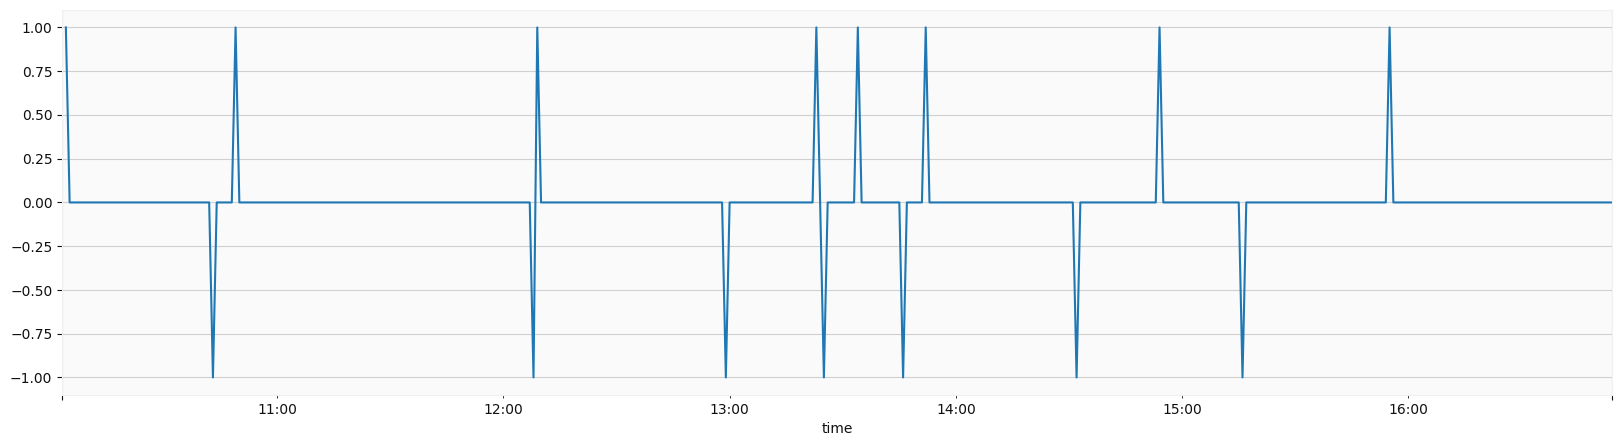

In [552]:
df["signal"].plot(figsize=(20, 5))

In [553]:
df

,open,high,low,close,tick_volume,spread,real_volume,ema_short,ema_long,upper_band,lower_band,sma,rsi,signal
time,,,,,,,,,,,,,,
2023-05-23 10:03:00,24.16,24.18,24.09,24.10,259,1,343600,24.100000,24.100000,NaN,NaN,NaN,NaN,NaN
2023-05-23 10:04:00,24.09,24.23,24.03,24.23,224,1,272600,24.120000,24.109630,NaN,NaN,NaN,NaN,1.0
2023-05-23 10:05:00,24.21,24.30,24.20,24.21,197,1,242400,24.133846,24.117064,NaN,NaN,NaN,NaN,0.0
2023-05-23 10:06:00,24.21,24.29,24.21,24.24,254,1,261600,24.150178,24.126171,NaN,NaN,NaN,NaN,0.0
2023-05-23 10:07:00,24.25,24.27,24.20,24.20,132,1,156000,24.157843,24.131640,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 16:50:00,24.77,24.77,24.74,24.75,216,1,95800,24.759079,24.754112,24.783391,24.727609,24.7555,46.666667,0.0
2023-05-23 16:51:00,24.75,24.77,24.74,24.77,234,1,61500,24.760759,24.755289,24.784580,24.727420,24.7560,60.000000,0.0
2023-05-23 16:52:00,24.75,24.78,24.75,24.77,245,1,103400,24.762181,24.756379,24.785718,24.727282,24.7565,60.000000,0.0


<AxesSubplot:xlabel='time'>

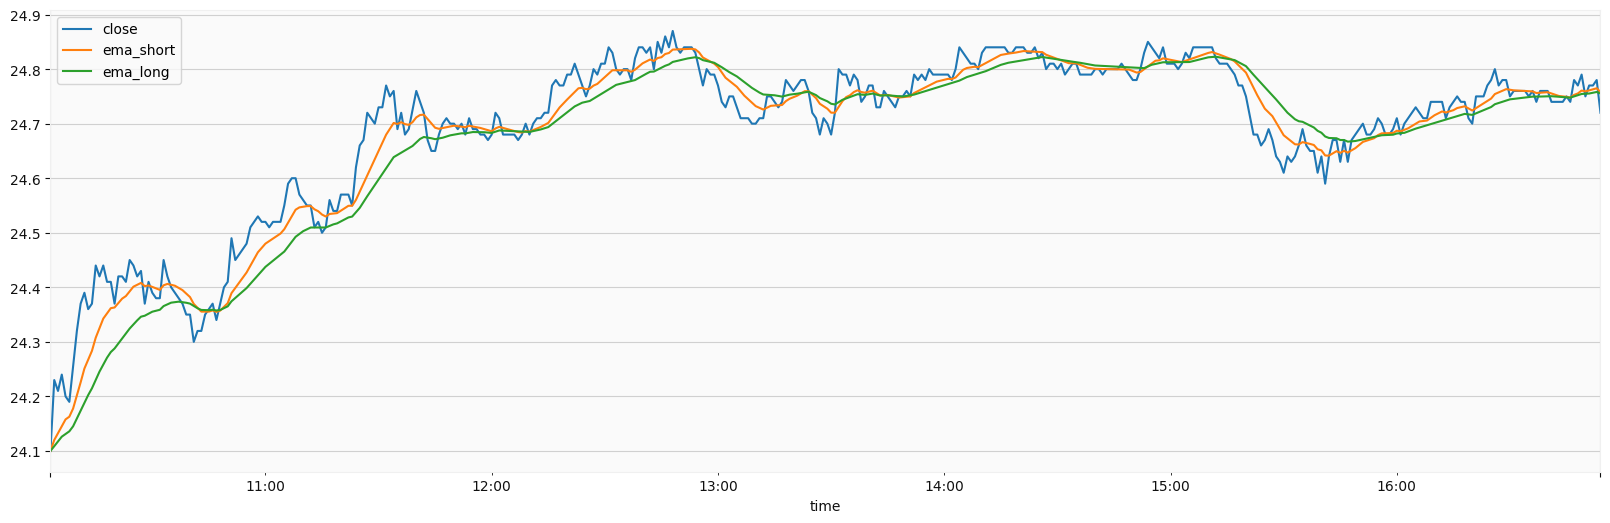

In [554]:
df[['close','ema_short', 'ema_long']].plot(figsize=(20, 6))

In [555]:
#Calcular os sinais de compra e venda BB
df["signal"] = 0
df.loc[(df["close"] < df["lower_band"]), "signal"] = 1
df.loc[(df["close"] > df["upper_band"]), "signal"] = -1

<AxesSubplot:xlabel='time'>

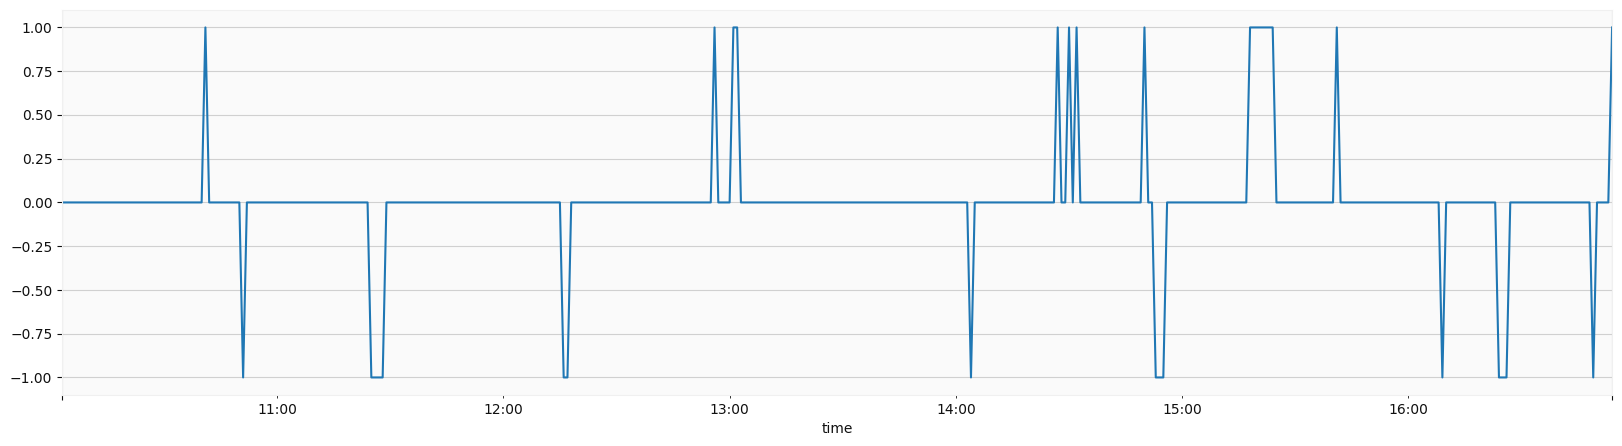

In [556]:
df["signal"].plot(figsize=(20, 5))

In [557]:
df

,open,high,low,close,tick_volume,spread,real_volume,ema_short,ema_long,upper_band,lower_band,sma,rsi,signal
time,,,,,,,,,,,,,,
2023-05-23 10:03:00,24.16,24.18,24.09,24.10,259,1,343600,24.100000,24.100000,NaN,NaN,NaN,NaN,0
2023-05-23 10:04:00,24.09,24.23,24.03,24.23,224,1,272600,24.120000,24.109630,NaN,NaN,NaN,NaN,0
2023-05-23 10:05:00,24.21,24.30,24.20,24.21,197,1,242400,24.133846,24.117064,NaN,NaN,NaN,NaN,0
2023-05-23 10:06:00,24.21,24.29,24.21,24.24,254,1,261600,24.150178,24.126171,NaN,NaN,NaN,NaN,0
2023-05-23 10:07:00,24.25,24.27,24.20,24.20,132,1,156000,24.157843,24.131640,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 16:50:00,24.77,24.77,24.74,24.75,216,1,95800,24.759079,24.754112,24.783391,24.727609,24.7555,46.666667,0
2023-05-23 16:51:00,24.75,24.77,24.74,24.77,234,1,61500,24.760759,24.755289,24.784580,24.727420,24.7560,60.000000,0
2023-05-23 16:52:00,24.75,24.78,24.75,24.77,245,1,103400,24.762181,24.756379,24.785718,24.727282,24.7565,60.000000,0


In [558]:
#Calcular os sinais de compra e venda RSI
df["signal"] = 0
df.loc[(df["rsi"] < 20), "signal"] = 1
df.loc[(df["rsi"] > 80), "signal"] = -1

<AxesSubplot:xlabel='time'>

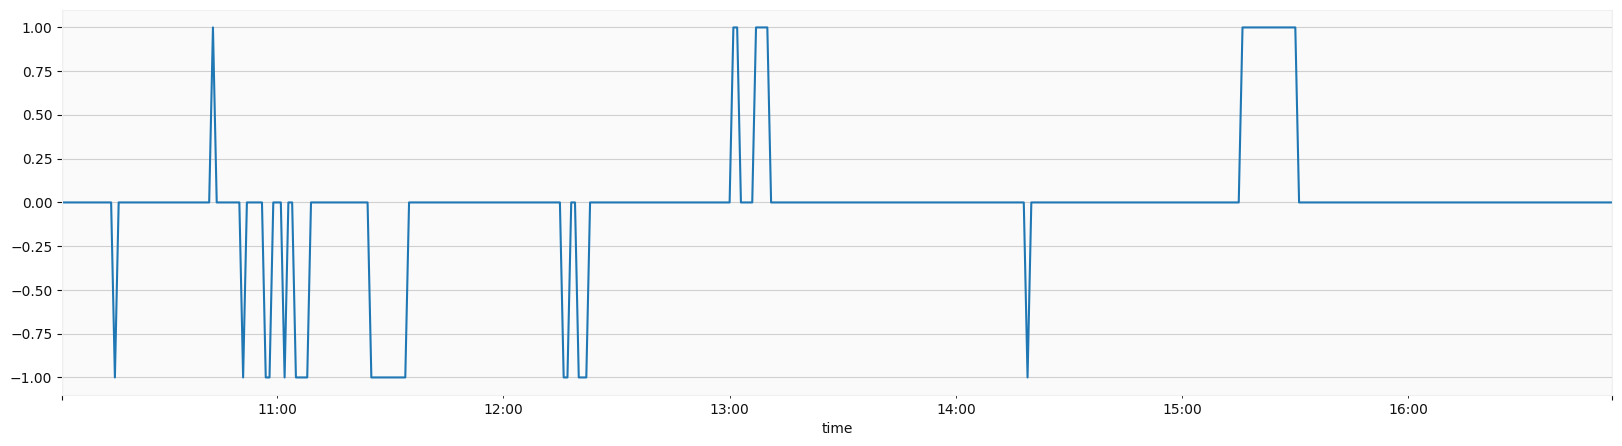

In [559]:
df["signal"].plot(figsize=(20, 5))

In [560]:
df

,open,high,low,close,tick_volume,spread,real_volume,ema_short,ema_long,upper_band,lower_band,sma,rsi,signal
time,,,,,,,,,,,,,,
2023-05-23 10:03:00,24.16,24.18,24.09,24.10,259,1,343600,24.100000,24.100000,NaN,NaN,NaN,NaN,0
2023-05-23 10:04:00,24.09,24.23,24.03,24.23,224,1,272600,24.120000,24.109630,NaN,NaN,NaN,NaN,0
2023-05-23 10:05:00,24.21,24.30,24.20,24.21,197,1,242400,24.133846,24.117064,NaN,NaN,NaN,NaN,0
2023-05-23 10:06:00,24.21,24.29,24.21,24.24,254,1,261600,24.150178,24.126171,NaN,NaN,NaN,NaN,0
2023-05-23 10:07:00,24.25,24.27,24.20,24.20,132,1,156000,24.157843,24.131640,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 16:50:00,24.77,24.77,24.74,24.75,216,1,95800,24.759079,24.754112,24.783391,24.727609,24.7555,46.666667,0
2023-05-23 16:51:00,24.75,24.77,24.74,24.77,234,1,61500,24.760759,24.755289,24.784580,24.727420,24.7560,60.000000,0
2023-05-23 16:52:00,24.75,24.78,24.75,24.77,245,1,103400,24.762181,24.756379,24.785718,24.727282,24.7565,60.000000,0


In [561]:
# import time
#
# lot_size = 1000
# initial_balance = 10000
# # lot = 0.10
# # result = 0
# # order = None
# # price = None
# request = {}
#
# # df['ema_short'] = df['close'].ewm(span=ema_period_short, adjust=False).mean()
# # df['ema_long'] = df['close'].ewm(span=ema_period_long, adjust=False).mean()
# # df['bb_upper'], df['bb_middle'], df['bb_lower'] = \
# #     ta.bollinger_bands(df['close'], bb_period, bb_deviation)
# # df['rsi'] = ta.rsi(df['close'], rsi_period)
#
# # Definição da estratégia de investimento
# df['signal'] = 0
# df.loc[(df['ema_short'] > df['ema_long']) &
#          (df['close'] < df['lower_band']) &
#          (df['rsi'] < 30), 'signal'] = 1
# df.loc[(df['ema_short'] < df['ema_long']) &
#          (df['close'] > df['upper_band']) &
#          (df['rsi'] > 70), 'signal'] = -1
#
# # Criação de um novo DataFrame com informações sobre as operações de compra/venda
# positions = pd.DataFrame(index=df.index)
# positions['signal'] = df['signal']
# positions['close'] = df['close']
# positions['rsi'] = df['rsi']
# positions['bb_upper'] = df['upper_band']
# positions['bb_middle'] = df['sma']
# positions['bb_lower'] = df['lower_band']
# positions['ema_short'] = df['ema_short']
# positions['ema_long'] = df['ema_long']
# positions['position'] = positions['signal'].diff()
# positions['position'].iloc[0] = positions['signal'].iloc[0]
# positions = positions[positions['position'] != 0]
#
# # Realização do backtesting
# balance = initial_balance
# trades = []
# for i, row in positions.iterrows():
#     print("aqui")
#     if row['position'] == 1:
#         order = mt5.ORDER_TYPE_BUY
#         price = mt5.symbol_info_tick(symbol).ask
#         print(f"Compra realizada em {i} por {price}")
#     elif row['position'] == -1:
#         order = mt5.ORDER_TYPE_SELL
#         price = mt5.symbol_info_tick(symbol).bid
#         print(f"Venda realizada em {i} por {price}")
#
#     lot = lot_size
#     request = {
#         "action": mt5.TRADE_ACTION_DEAL,
#         "symbol": symbol,
#         "volume": lot,
#         "type": order,
#         "price": price,
#         "deviation": 100,
#         "magic": 123456,
#         "comment": "Python script open",
#         "type_time": mt5.ORDER_TIME_GTC,
#         "type_filling": mt5.ORDER_FILLING_IOC,
#     }
#
# # Envio da ordem de compra ou venda
# result = mt5.order_send(request)
#
# if result.retcode != mt5.TRADE_RETCODE_DONE:
#     print(f"Erro ao enviar ordem: {result.comment}")
#
# # Se a ordem foi enviada com sucesso, aguarda sua execução
# while True:
#     # Configurar o símbolo e o timeframe
#     symbol = "EURUSD"
#     timeframe = mt5.TIMEFRAME_M5
#
#     # Obter os dados do símbolo e timeframe
#     rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, 100)
#
#     # Obtém informações sobre a ordem
#     order = mt5.orders_get(result.order)
#
#     print("ESPERANDO EXECUÇÃO DA ORDEM")
#
#     if order == mt5.TRADE_RETCODE_DONE:
#         break
# #     time.sleep(1)ff

In [562]:
# import time
#
#
# symbol = "EURUSD"
# lot = 0.1
# magic_number = 123456
# comment = "Signal from Python"
#
# # get the current price
# price = mt5.symbol_info_tick(symbol).ask
#
# # open a position
# request = {
#     "action": mt5.TRADE_ACTION_DEAL,
#     "symbol": symbol,
#     "volume": lot,
#     "type": mt5.ORDER_TYPE_BUY,
#     "price": price,
#     "magic": magic_number,
#     "comment": comment,
#     "type_time": mt5.ORDER_TIME_GTC,
#     "type_filling": mt5.ORDER_FILLING_FOK,
# }
# result = mt5.order_send(request)
# if result.retcode != mt5.TRADE_RETCODE_DONE:
#     print("order_send failed, retcode={}".format(result.retcode))
#     mt5.shutdown()
#     quit()
#
# # wait for the order to be filled
# while True:
#     deals = mt5.history_deals_get(symbol=symbol)
#     if len(deals) > 0:
#         last_deal = deals[-1]
#         if last_deal.magic == magic_number and last_deal.entry == mt5.DEAL_ENTRY_IN:
#             print("Position opened: ticket={}".format(last_deal.order))
#             break
#     time.sleep(1)

In [563]:
#Portfolio para backtesting
#Setup EMA
import vectorbt as vbt

buy_signal = (df["ema_short"] > df["ema_long"])
sell_signal = (df["ema_short"] < df["ema_long"])

pf = vbt.Portfolio.from_signals(df['close'], buy_signal, sell_signal)

In [564]:
pf.plot().show()

In [565]:
pf.stats()

Start                         2023-05-23 10:03:00
End                           2023-05-23 16:54:00
Period                            0 days 06:52:00
Start Value                                 100.0
End Value                              101.278299
Total Return [%]                         1.278299
Benchmark Return [%]                     2.572614
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                         1.083493
Max Drawdown Duration             0 days 04:06:00
Total Trades                                    8
Total Closed Trades                             7
Total Open Trades                               1
Open Trade PnL                            0.04097
Win Rate [%]                            42.857143
Best Trade [%]                           1.147541
Worst Trade [%]                         -0.242131
Avg Winning Trade [%]                    0.627785
Avg Losing Trade [%]                    -0.215011


In [566]:
#Portifolio para trading
#Setup RSI

buy_signal = (df["rsi"] < 20)
sell_signal = (df["rsi"] > 80)

pf = vbt.Portfolio.from_signals(df['close'], buy_signal, sell_signal)

In [567]:
pf.plot().show()

In [568]:
pf.stats()

Start                         2023-05-23 10:03:00
End                           2023-05-23 16:54:00
Period                            0 days 06:52:00
Start Value                                 100.0
End Value                              100.779894
Total Return [%]                         0.779894
Benchmark Return [%]                     2.572614
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                         0.846774
Max Drawdown Duration             0 days 01:09:00
Total Trades                                    3
Total Closed Trades                             2
Total Open Trades                               1
Open Trade PnL                          -0.326149
Win Rate [%]                                100.0
Best Trade [%]                           0.699013
Worst Trade [%]                          0.404204
Avg Winning Trade [%]                    0.551608
Avg Losing Trade [%]                          NaN


In [569]:
buy_signal

time
2023-05-23 10:03:00    False
2023-05-23 10:04:00    False
2023-05-23 10:05:00    False
2023-05-23 10:06:00    False
2023-05-23 10:07:00    False
                       ...  
2023-05-23 16:50:00    False
2023-05-23 16:51:00    False
2023-05-23 16:52:00    False
2023-05-23 16:53:00    False
2023-05-23 16:54:00    False
Name: rsi, Length: 412, dtype: bool

In [570]:
#Portifolio para trading
#Setup Bollinger Bands

buy_signal = (df["close"] < df["lower_band"])
sell_signal = (df["close"] > df["upper_band"])

pf = vbt.Portfolio.from_signals(df['close'], buy_signal, sell_signal)

In [571]:
pf.plot().show()

In [572]:
pf.stats()

Start                               2023-05-23 10:03:00
End                                 2023-05-23 16:54:00
Period                                  0 days 06:52:00
Start Value                                       100.0
End Value                                    101.066406
Total Return [%]                               1.066406
Benchmark Return [%]                           2.572614
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                               0.726686
Max Drawdown Duration                   0 days 01:35:00
Total Trades                                          5
Total Closed Trades                                   4
Total Open Trades                                     1
Open Trade PnL                                      0.0
Win Rate [%]                                       75.0
Best Trade [%]                                 0.781893
Worst Trade [%]                               -0

In [573]:
#Portifolio para trading
#Setup Bollinger Bands + RSI

buy_signal = (df["close"] < df["lower_band"]) & (df["rsi"] < 20)
sell_signal = (df["close"] > df["upper_band"]) & (df["rsi"] > 80)

pf = vbt.Portfolio.from_signals(df['close'], buy_signal, sell_signal)

In [574]:
pf.plot().show()

In [575]:
pf.stats()

Start                         2023-05-23 10:03:00
End                           2023-05-23 16:54:00
Period                            0 days 06:52:00
Start Value                                 100.0
End Value                               99.919159
Total Return [%]                        -0.080841
Benchmark Return [%]                     2.572614
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                         1.046278
Max Drawdown Duration             0 days 02:00:00
Total Trades                                    1
Total Closed Trades                             0
Total Open Trades                               1
Open Trade PnL                          -0.080841
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


In [576]:
#Portifolio para trading
#Setup RSI + EMA

buy_signal = (df["rsi"] < 20) & (df["ema_short"] > df["ema_long"])
sell_signal = (df["rsi"] > 80) & (df["ema_short"] < df["ema_long"])

pf = vbt.Portfolio.from_signals(df['close'], buy_signal, sell_signal)

In [577]:
pf.plot().show()

In [578]:
pf.stats()

Start                         2023-05-23 10:03:00
End                           2023-05-23 16:54:00
Period                            0 days 06:52:00
Start Value                                 100.0
End Value                                   100.0
Total Return [%]                              0.0
Benchmark Return [%]                     2.572614
Max Gross Exposure [%]                        0.0
Total Fees Paid                               0.0
Max Drawdown [%]                              NaN
Max Drawdown Duration                         NaT
Total Trades                                    0
Total Closed Trades                             0
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


In [579]:
#Portifolio para trading
#Setup Bollinger Bands + RSI + EMA

buy_signal = (df["close"] < df["lower_band"]) & (df["rsi"] < 20) & (df["ema_short"] > df["ema_long"])
sell_signal = (df["close"] > df["upper_band"]) & (df["rsi"] > 80) & (df["ema_short"] < df["ema_long"])

pf = vbt.Portfolio.from_signals(df['close'], buy_signal, sell_signal)

In [580]:
pf.plot().show()

In [581]:
pf.stats()

Start                         2023-05-23 10:03:00
End                           2023-05-23 16:54:00
Period                            0 days 06:52:00
Start Value                                 100.0
End Value                                   100.0
Total Return [%]                              0.0
Benchmark Return [%]                     2.572614
Max Gross Exposure [%]                        0.0
Total Fees Paid                               0.0
Max Drawdown [%]                              NaN
Max Drawdown Duration                         NaT
Total Trades                                    0
Total Closed Trades                             0
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN
